In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #provides data structures to quickly analyze data
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data = pd.read_excel("Investment Pattern.xlsx")

In [ ]:
data.head()

,Timestamp,Name:,Age Group,Gender,Profession,Do you make investments?,What kind of investments do you make?,On a scale of 1-5 where do you consider your knowledge of investments,What are your expectations from the investments you are currently making,What is your main reason for investing ? (one word/one line answer),Why do you not invest in other options?,What are your views on the recent boom in Crypto and NFTs?,Why do you not invest?
0,2022-02-17 15:47:16.472,RAJESH SHETH,41-60 years,Male,Business,Yes,"Gold, PPF, Mutual Funds, Equity Shares, FDs",3.0,Long Term returns,Security,"High Values, High Risks, higher Maintenance co...",Government Policy not clear.,NaN
1,2022-02-17 15:47:38.898,Parth nagda,16-25 years,Male,Student,Yes,"Mutual Funds, Equity Shares",4.0,Long Term returns,Yeh hi future hai,N,NaN,NaN
2,2022-02-17 15:48:33.798,NaN,16-25 years,Other,Self employed,Yes,Sex toys,5.0,Short Term returns,Create more videos,Will expend soon,Good,NaN
3,2022-02-17 15:54:04.252,Vansh Matalia,16-25 years,Male,Student,Yes,"Gold, PPF, Mutual Funds, Equity Shares, FDs, R...",4.0,"Short Term returns, Long Term returns",Returns,"Gold, mutual funds are safe investments",NaN,NaN
4,2022-02-17 15:55:21.924,Trusar Sheth,41-60 years,Male,Business,Yes,Equity Shares,3.0,Long Term returns,Financial security,Not comfortable,None,NaN


In [ ]:
data1 = data[["What is your main reason for investing ? (one word/one line answer) "]]


In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [ ]:
pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=15139d3c5503b2644bb89c2afaf1368306c27471dd58c7898137ed3fa7625855
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


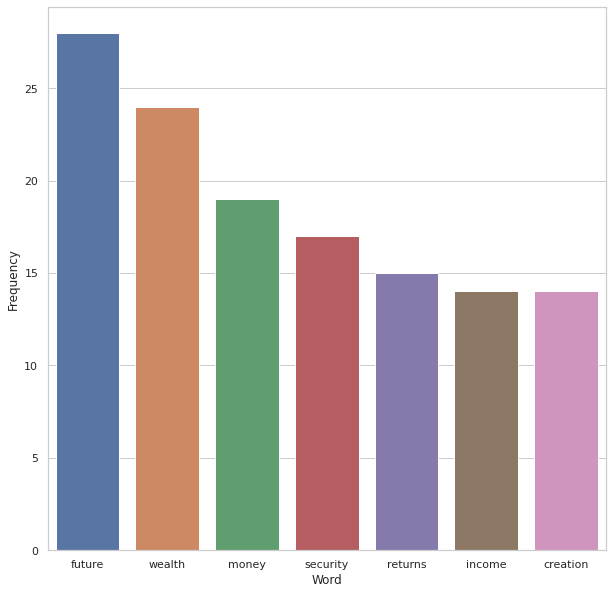

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)
a = data1["What is your main reason for investing ? (one word/one line answer) "].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
  if w not in stop_words:
    filtered_sentence.append(w)
    # Remove characters which have length less than 2  

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

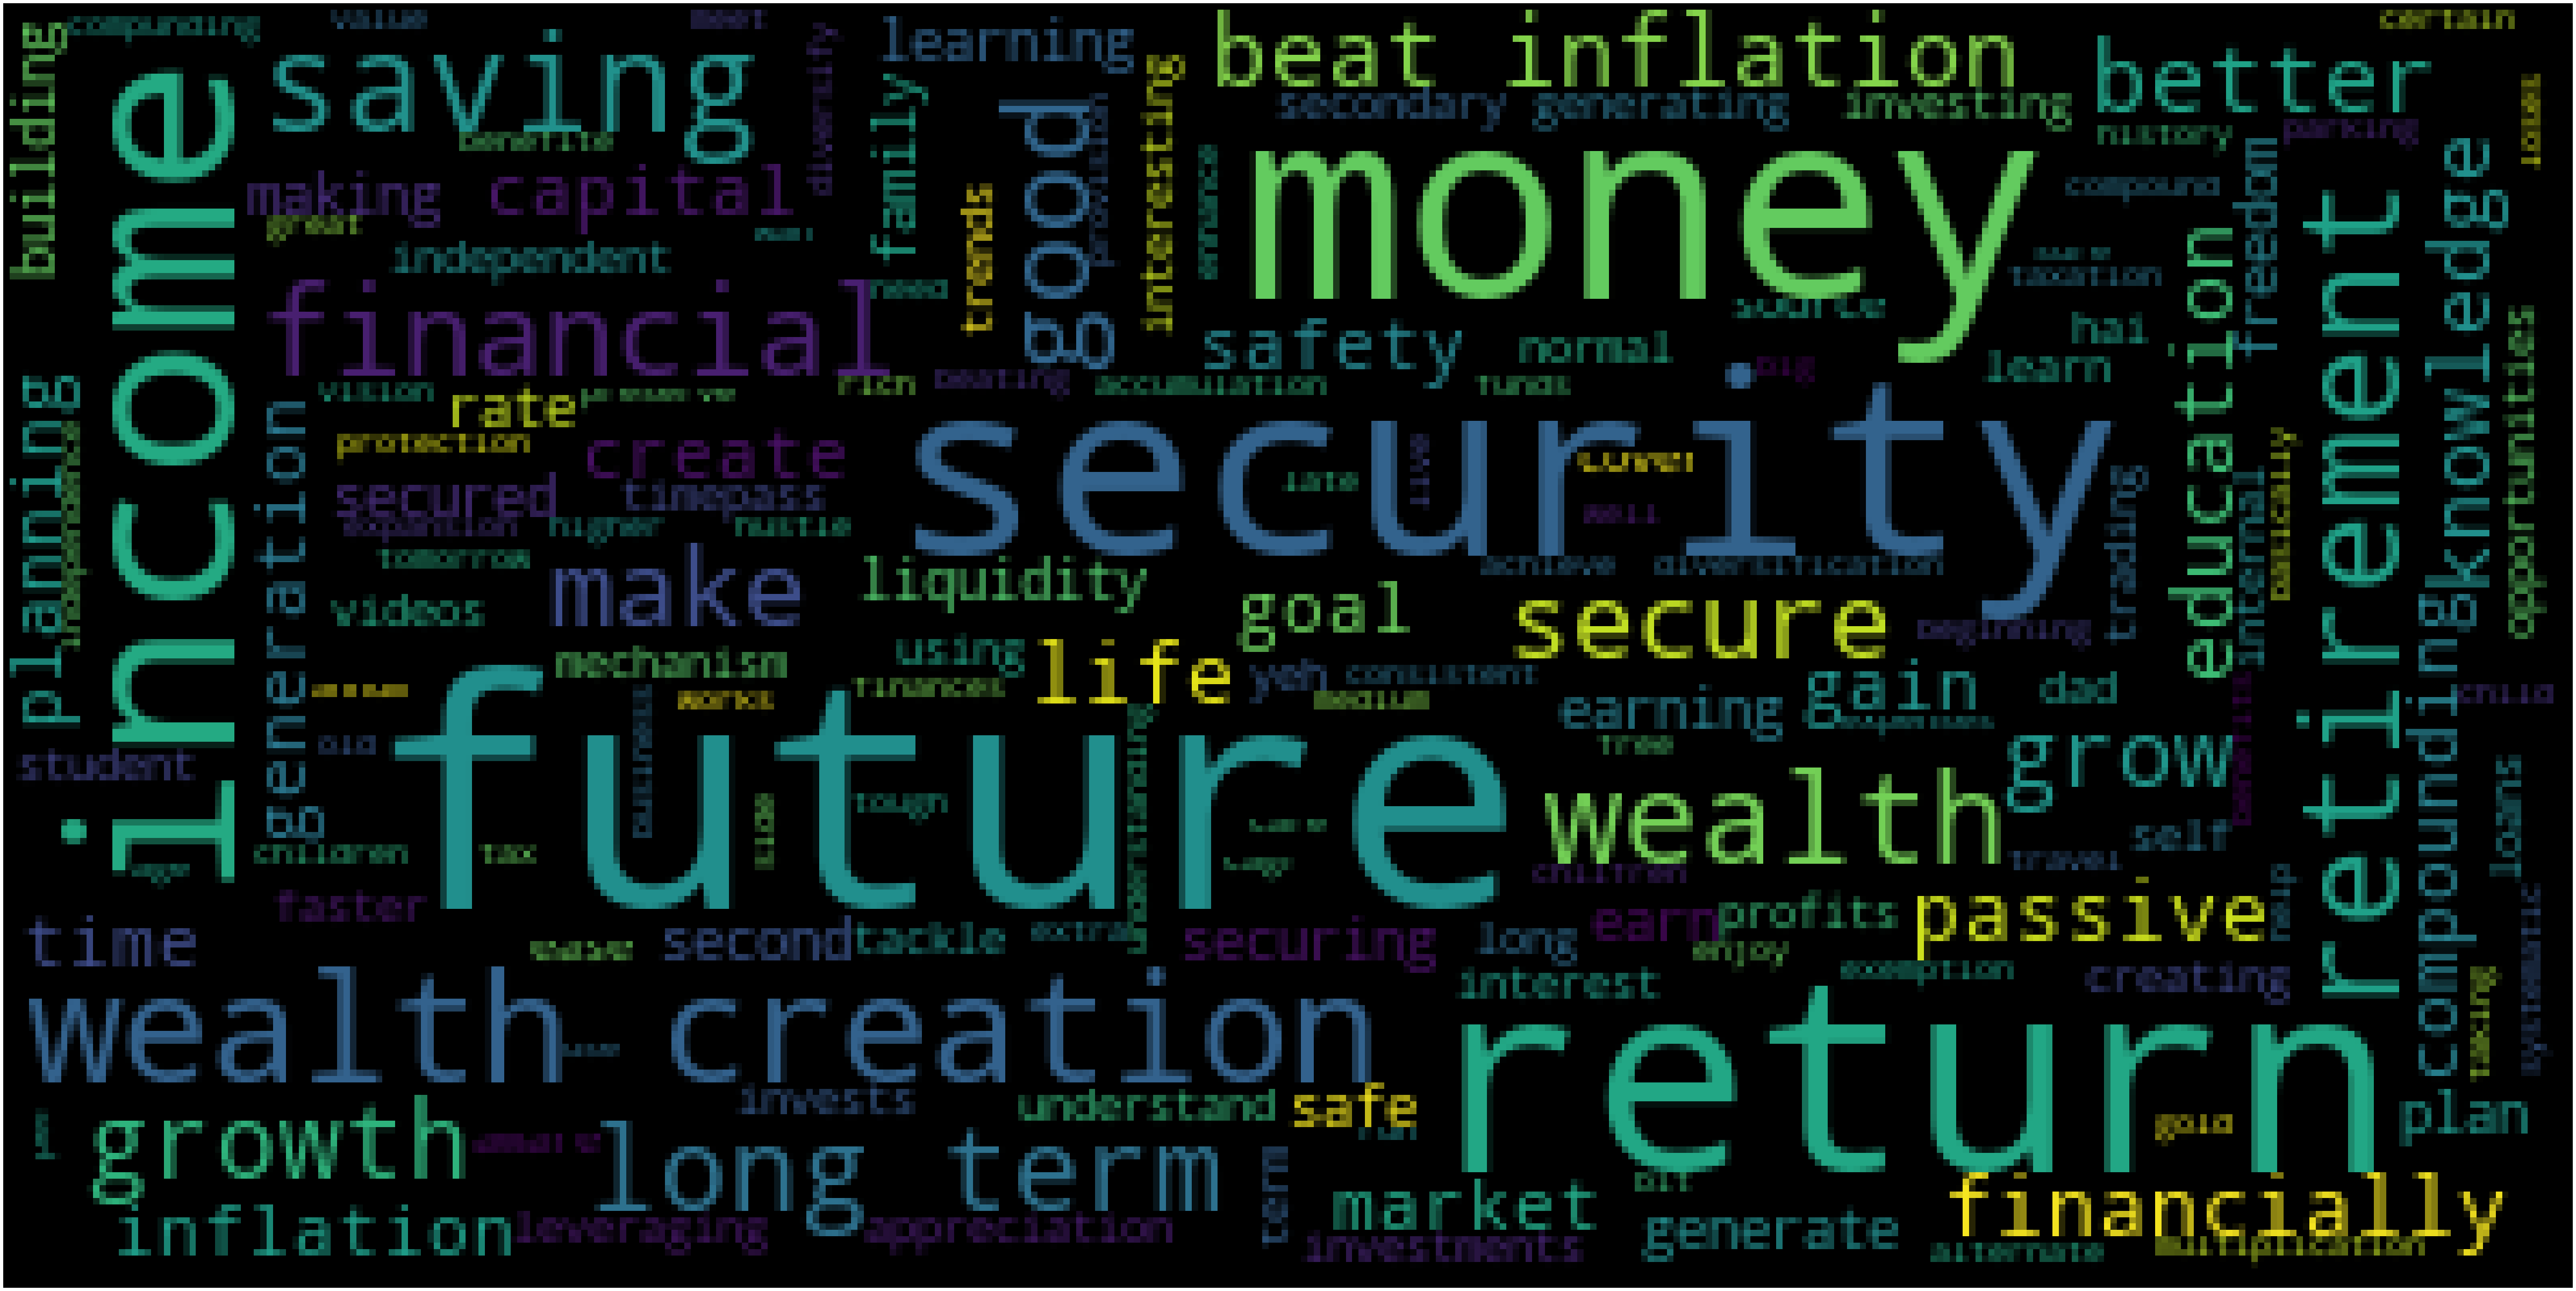

In [ ]:
def wc(data,bgcolor,title):
  plt.figure(figsize = (100,100))
  wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
  wc.generate(' '.join(data))
  plt.imshow(wc)
  plt.axis('off')

wc(cleaned_data_title,'black','Common Words' )

In [ ]:
data2 = data[["Why do you not invest in other options?"]]

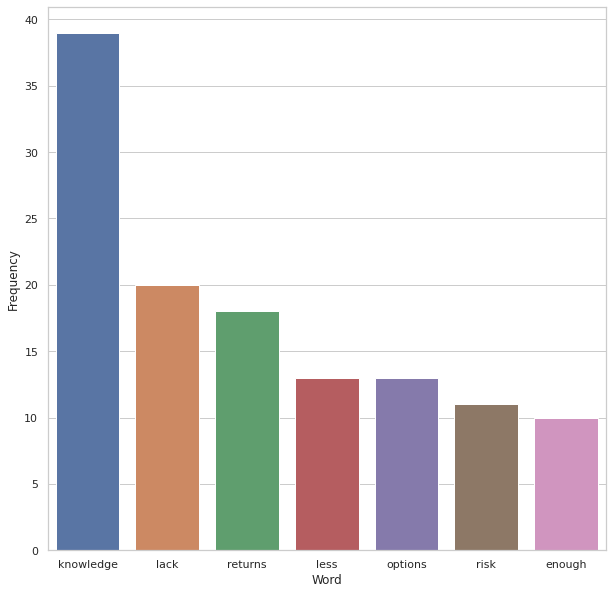

In [ ]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)
a = data2["Why do you not invest in other options?"].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
  if w not in stop_words:
    filtered_sentence.append(w)
    # Remove characters which have length less than 2  

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

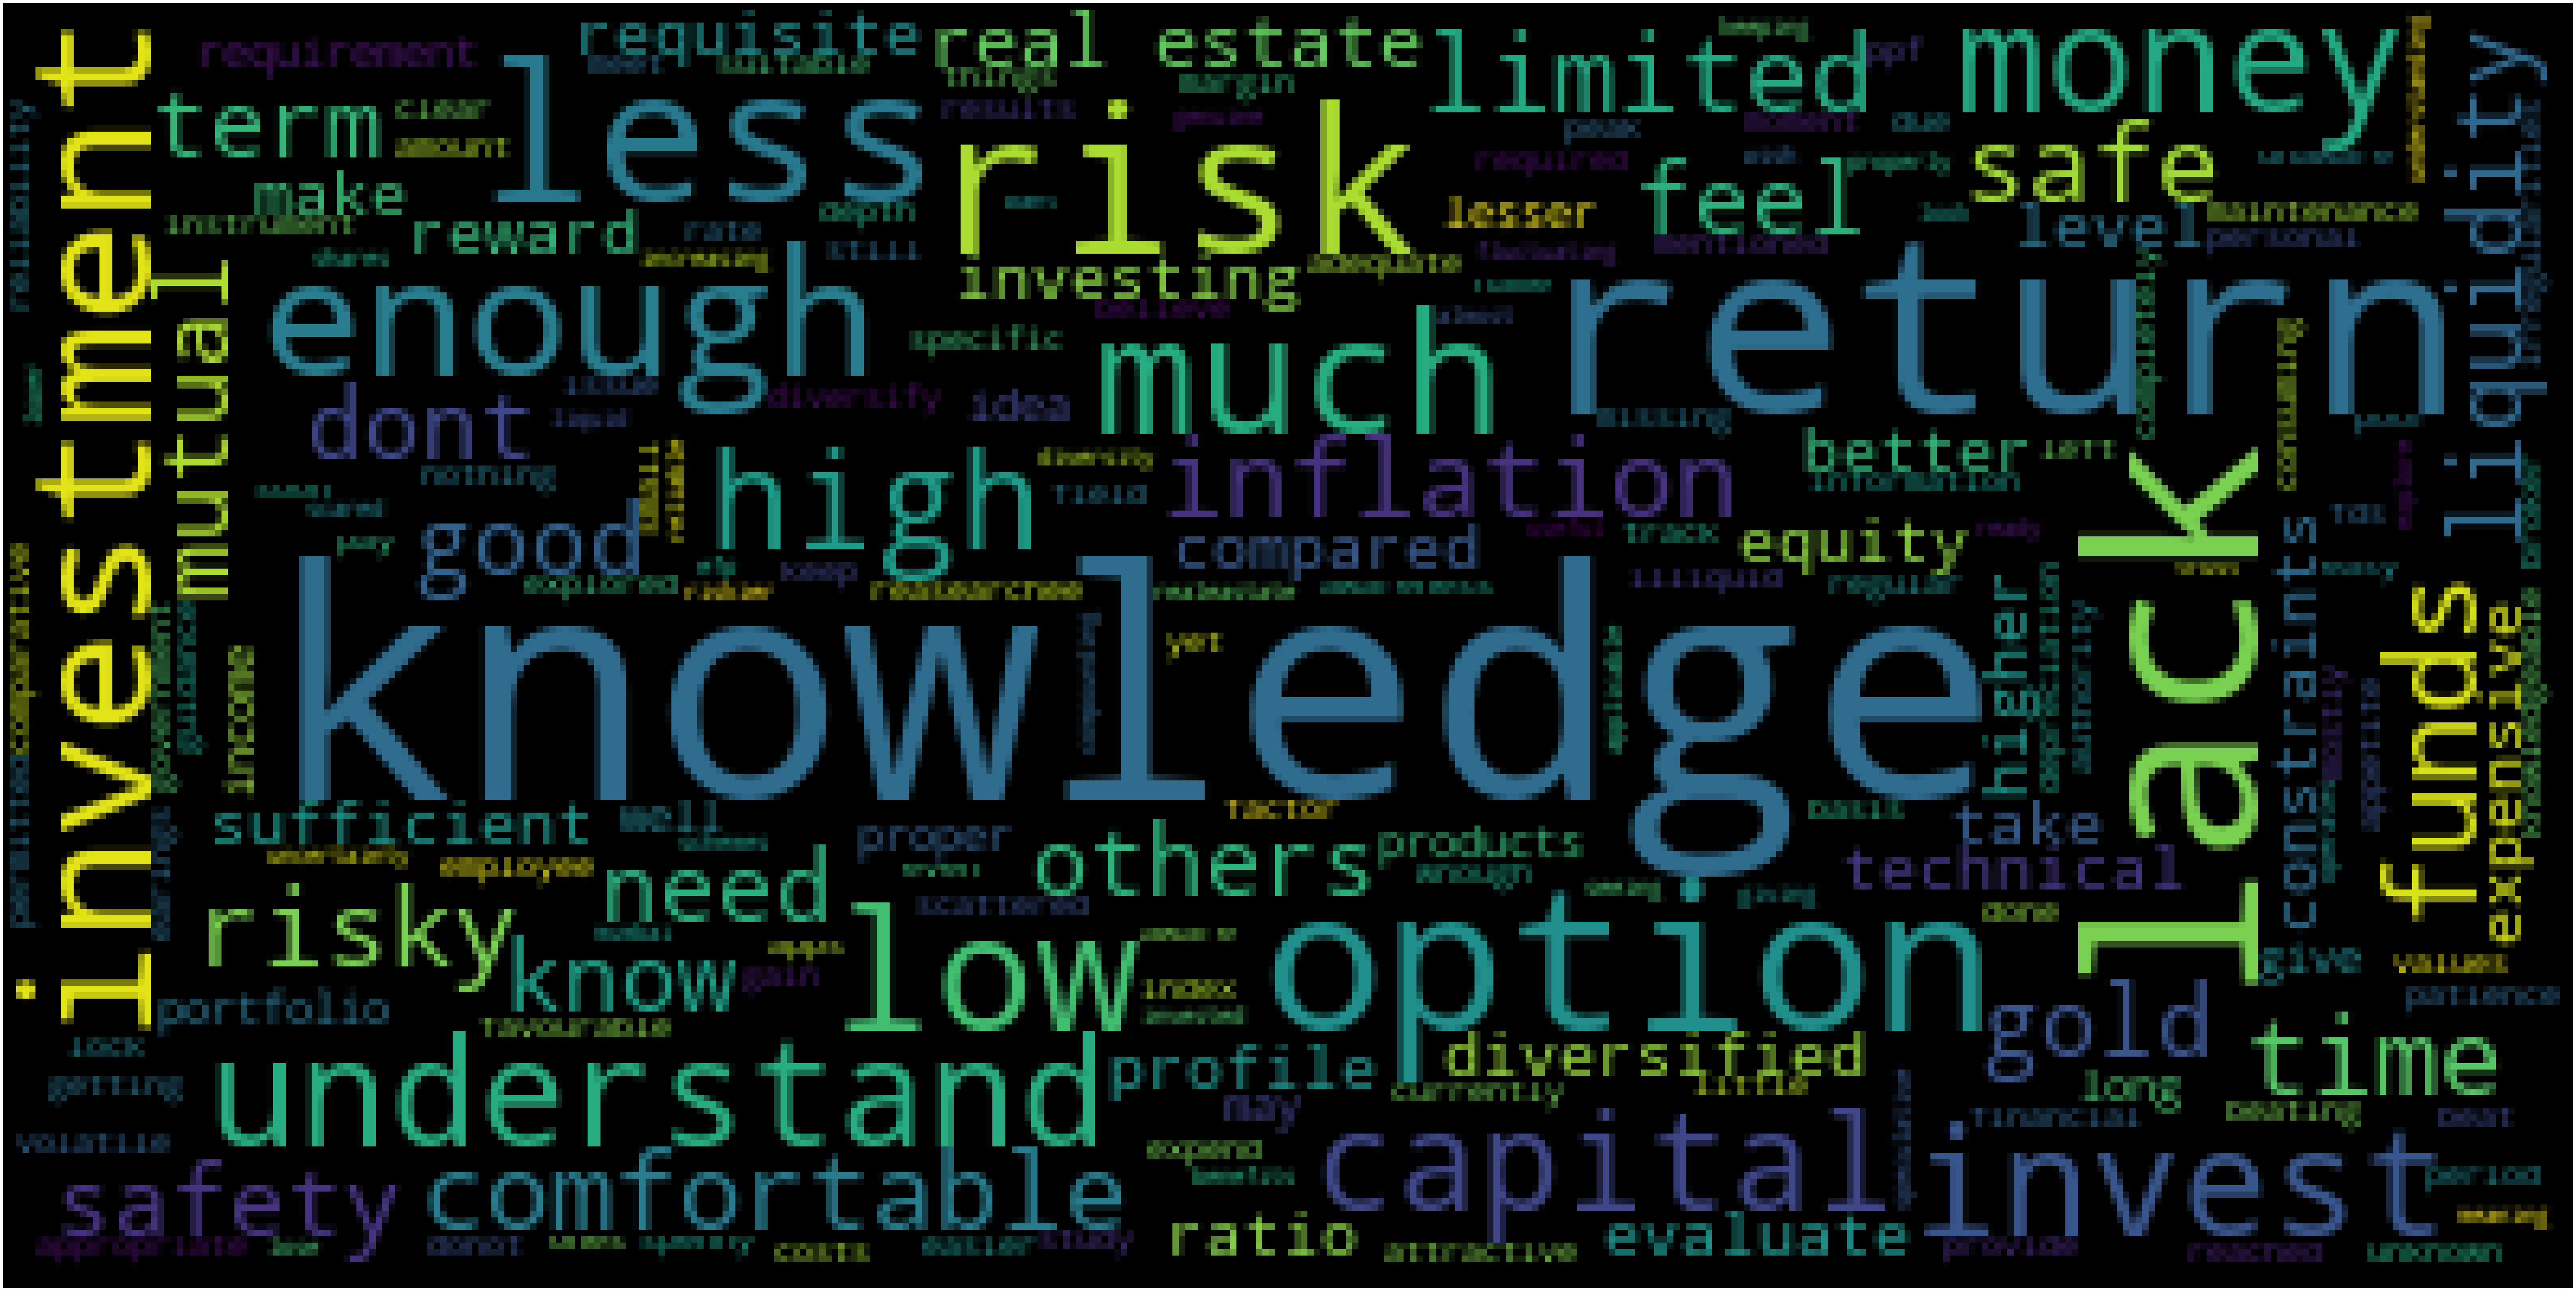

In [ ]:
wc(cleaned_data_title,'black','Common Words' )

In [ ]:
data3 = data[["What are your views on the recent boom in Crypto and NFTs?"]]

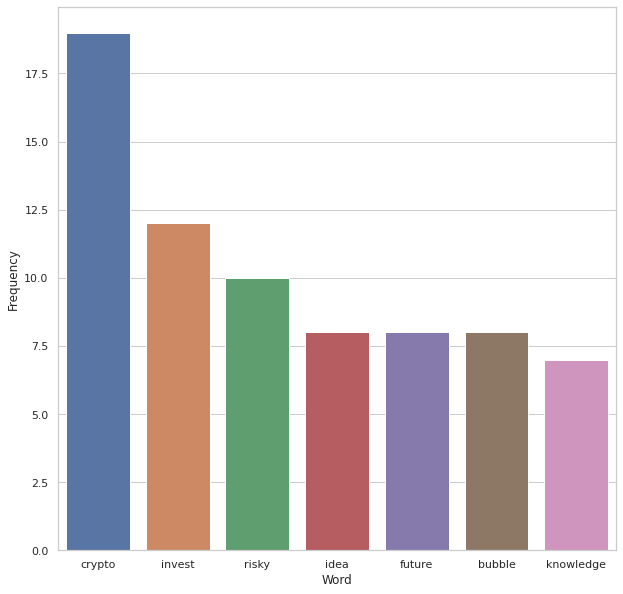

In [ ]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)
a = data3["What are your views on the recent boom in Crypto and NFTs?"].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
  if w not in stop_words:
    filtered_sentence.append(w)
    # Remove characters which have length less than 2  

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

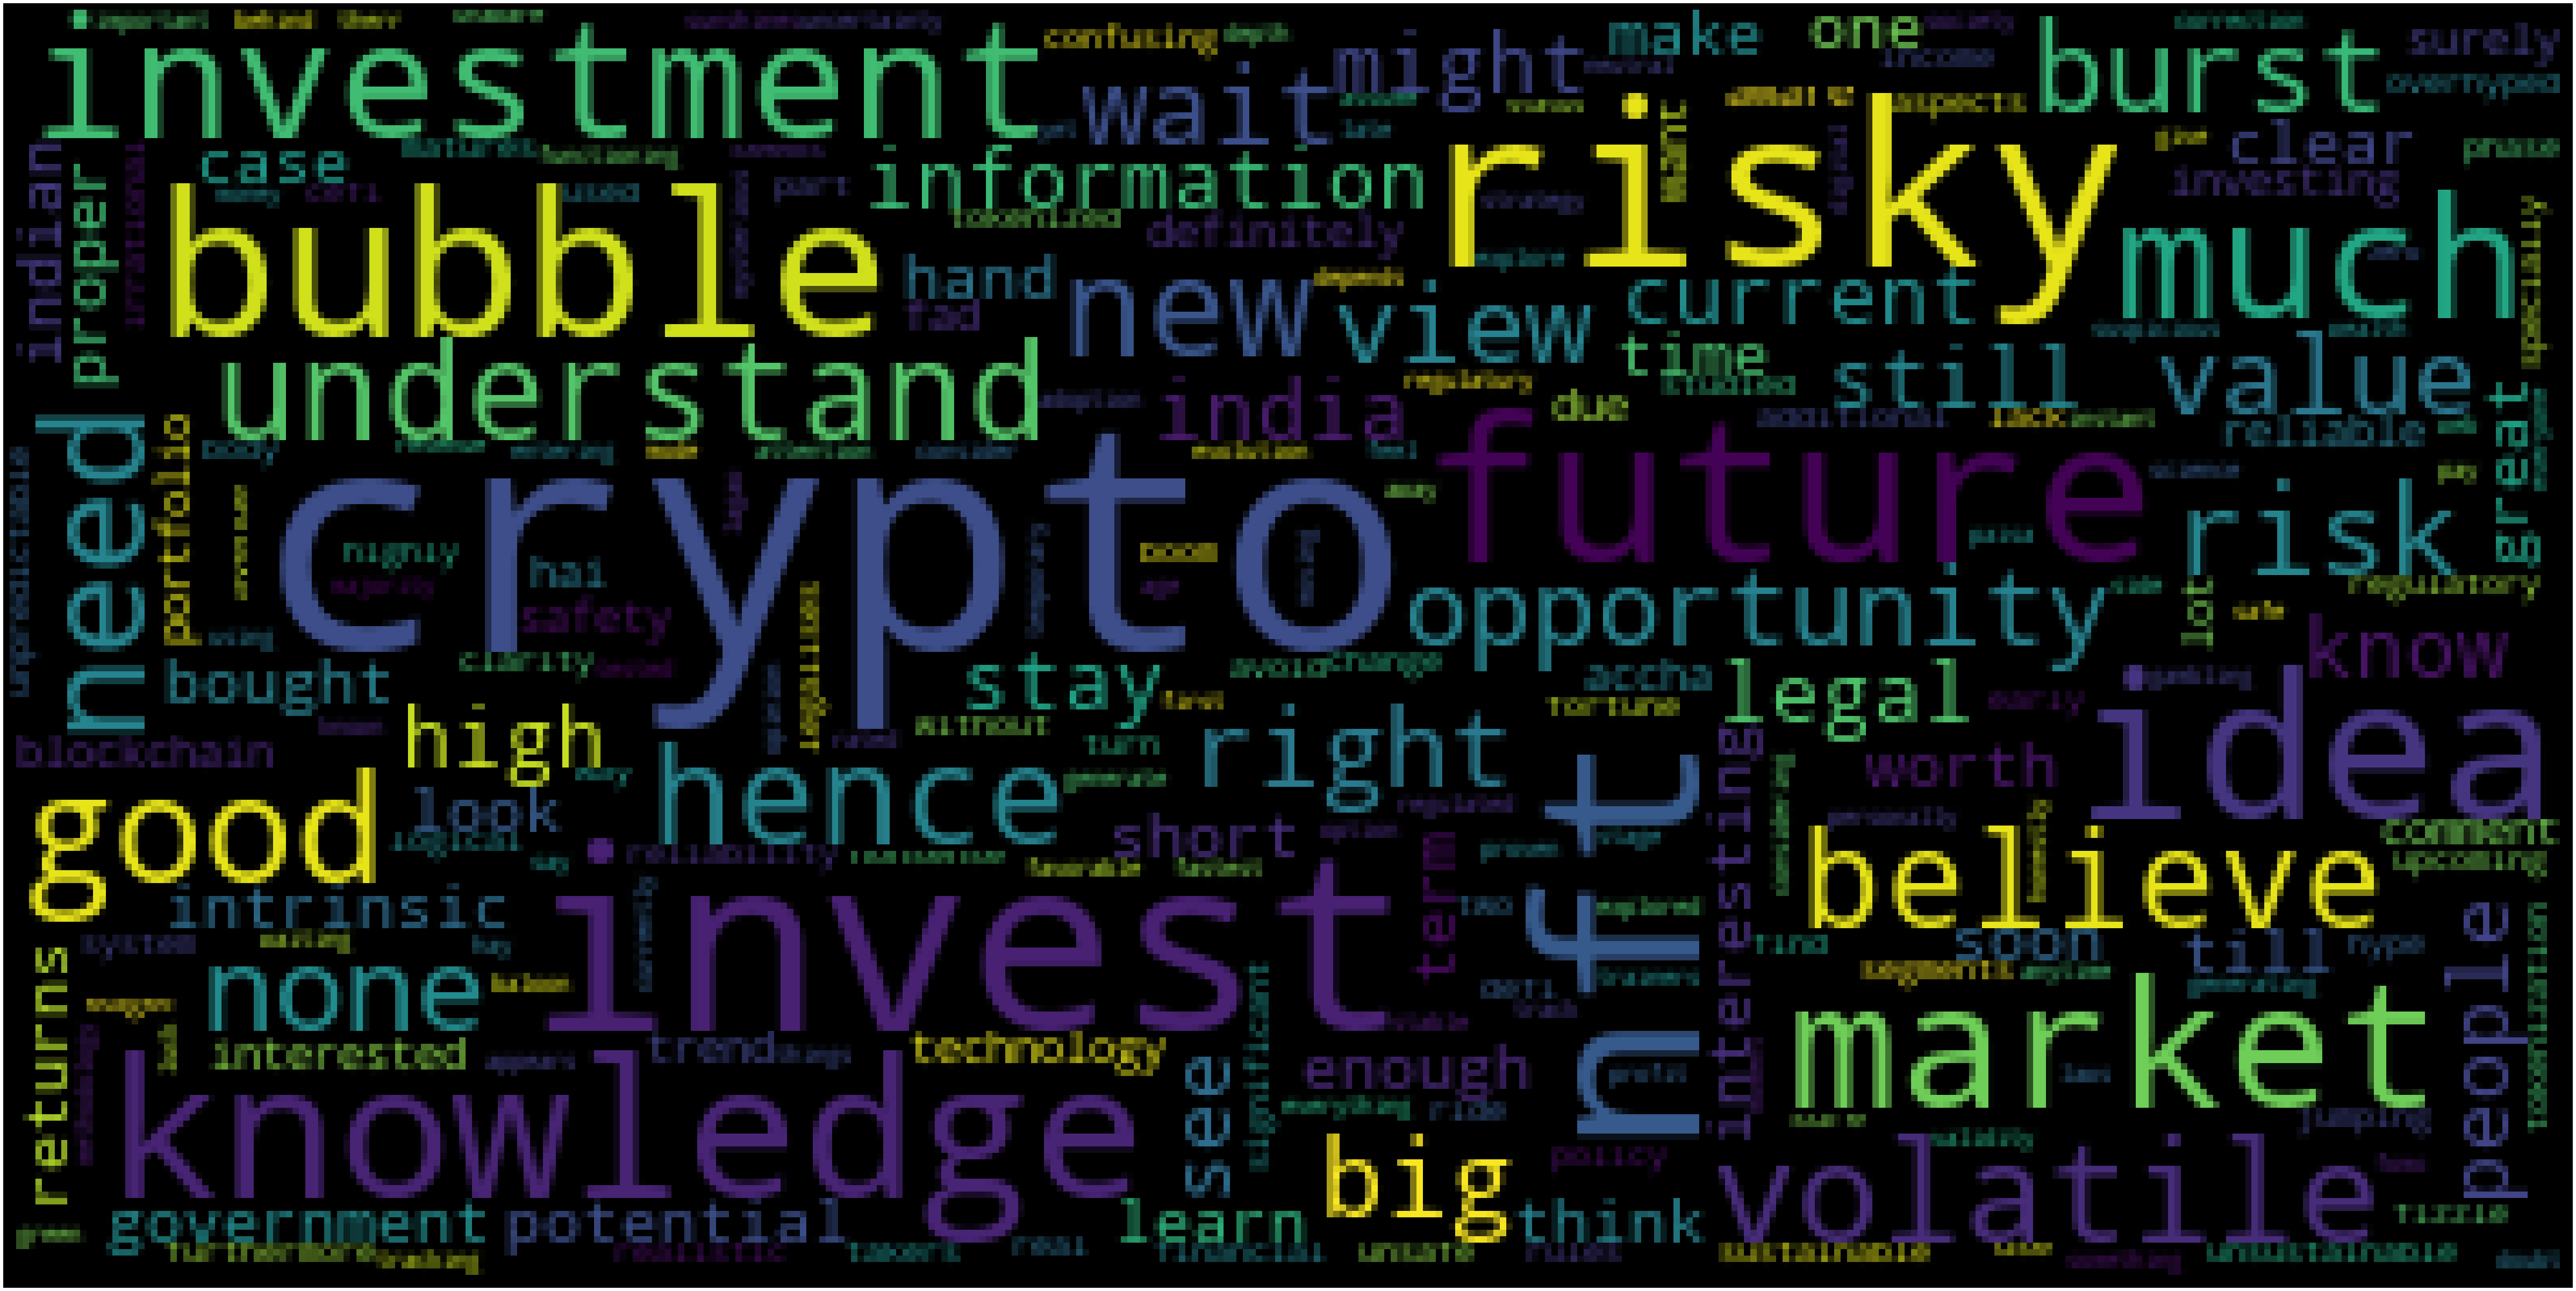

In [ ]:
wc(cleaned_data_title,'black','Common Words' )

In [ ]:
data4 = data[["Why do you not invest?"]]

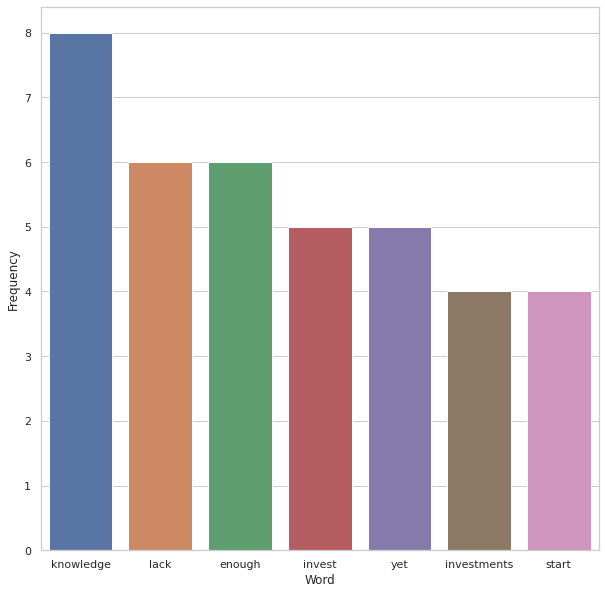

In [ ]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)
a = data4["Why do you not invest?"].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
  if w not in stop_words:
    filtered_sentence.append(w)
    # Remove characters which have length less than 2  

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

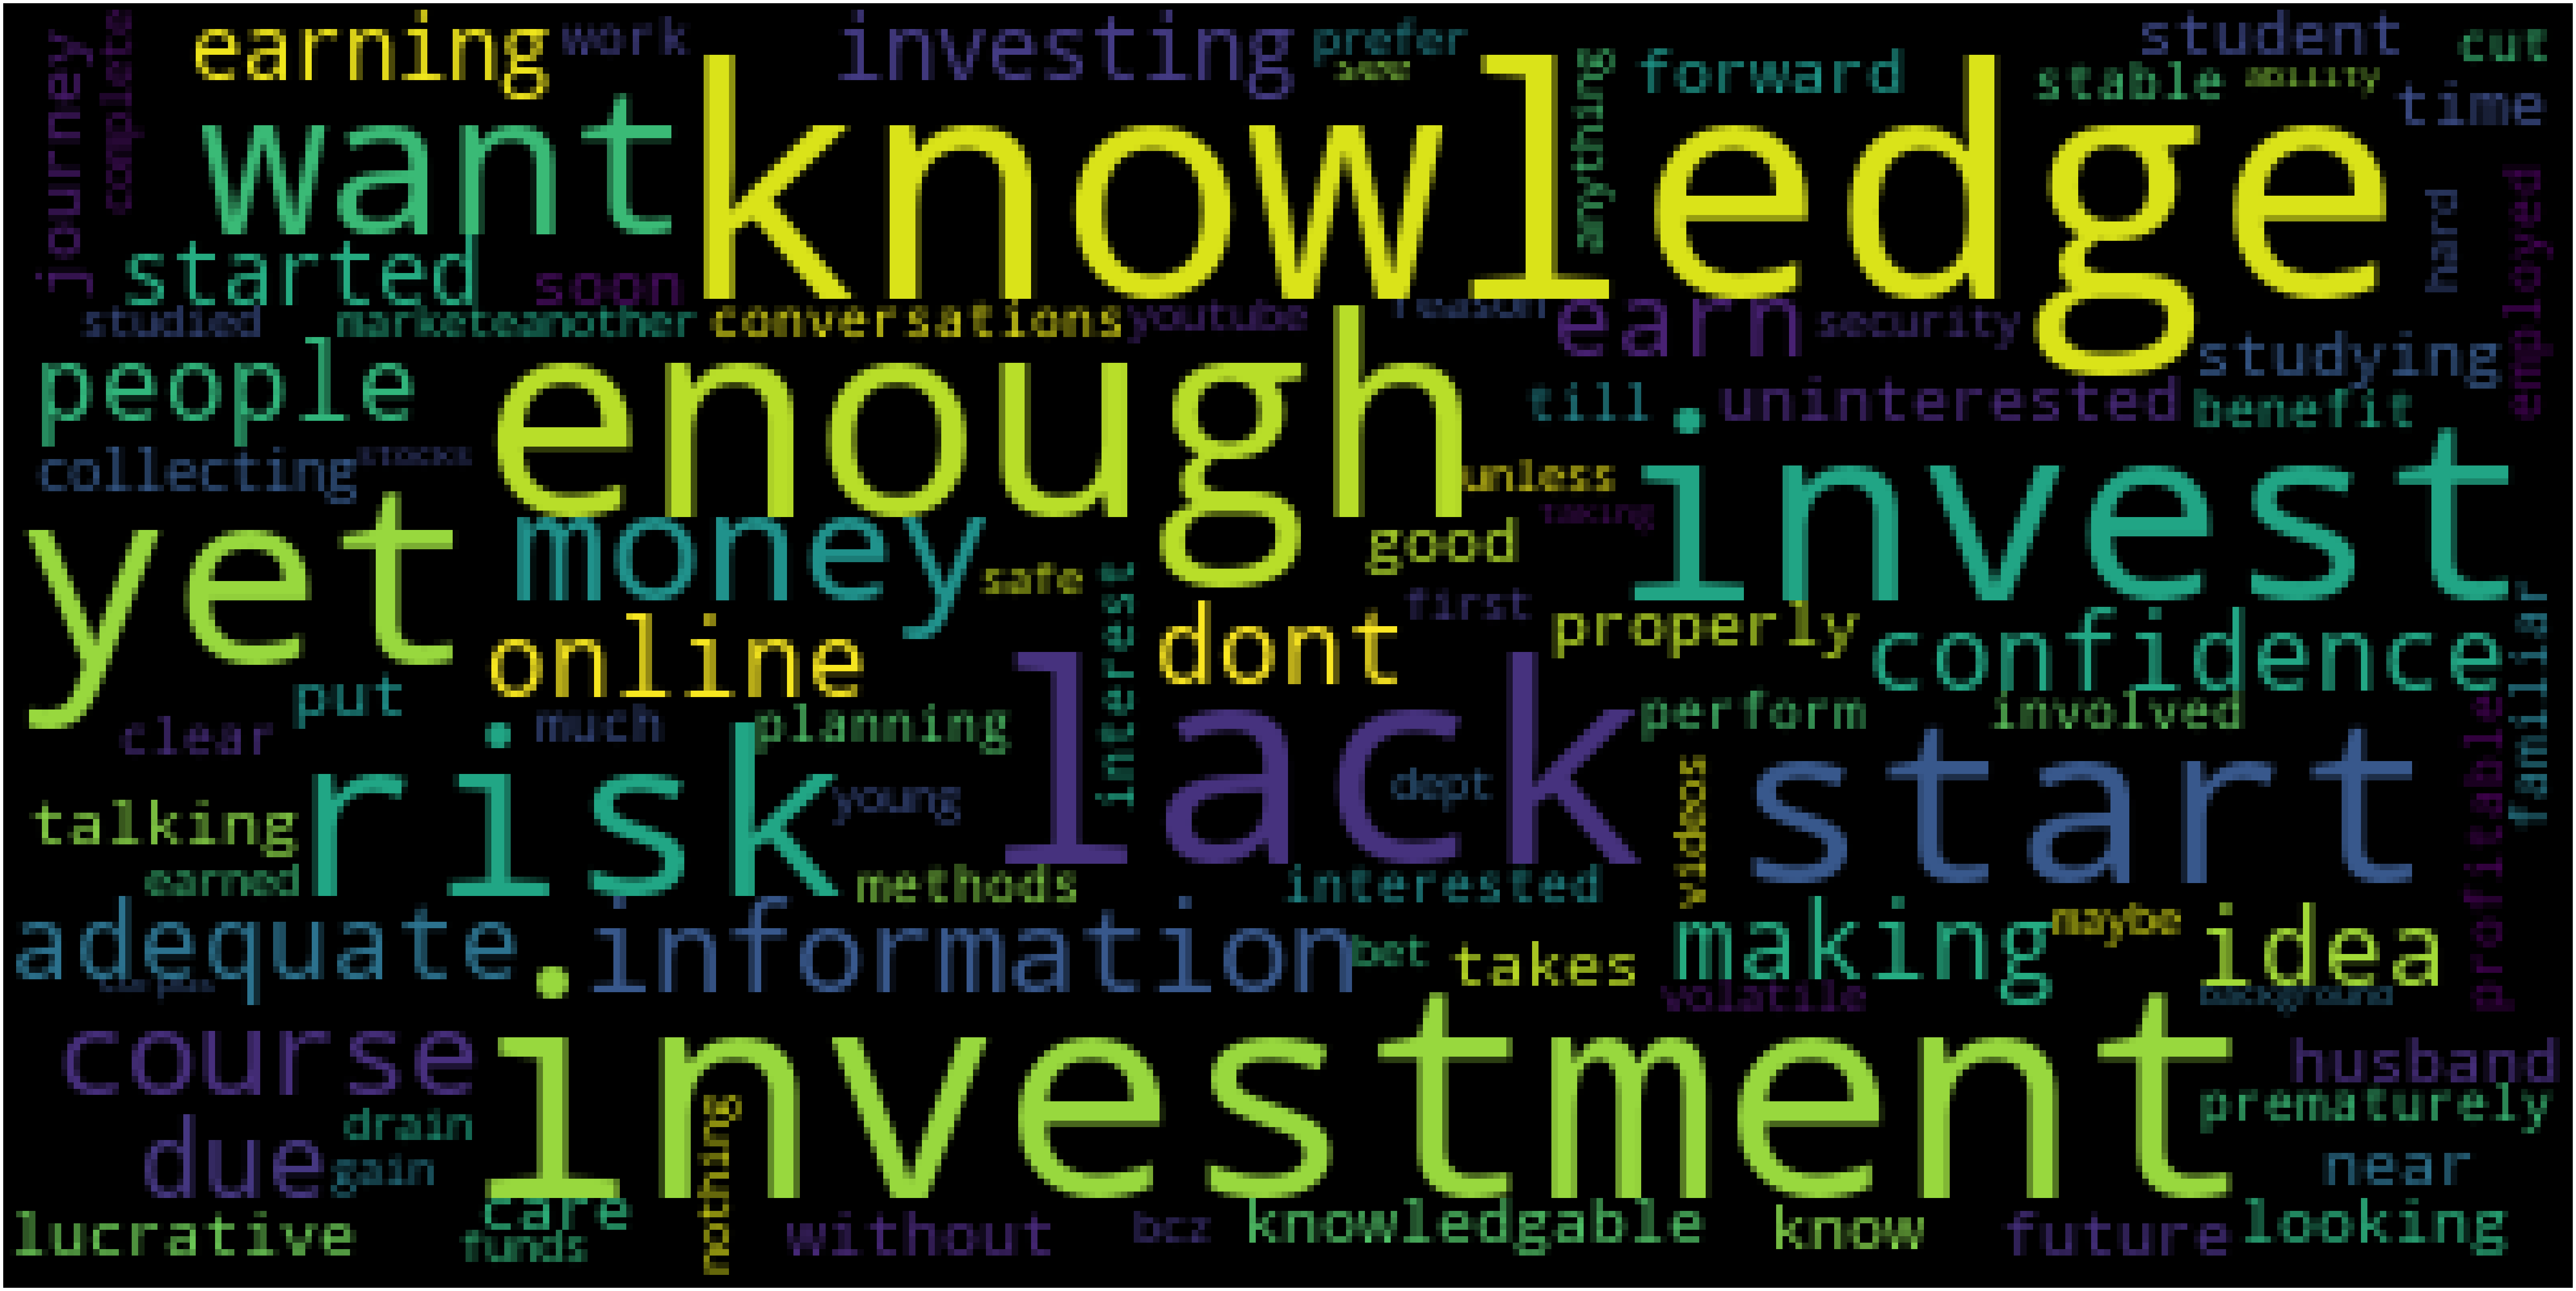

In [ ]:
wc(cleaned_data_title,'black','Common Words' )

In [ ]:
data5 = data[["Why do you not invest?","Why do you not invest in other options?"]]

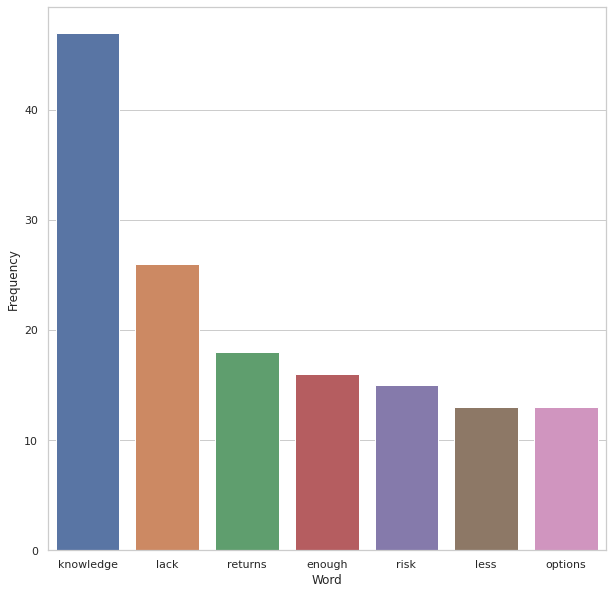

In [ ]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)
a = data5["Why do you not invest?"].str.lower().str.cat(sep=' ')
c = data5["Why do you not invest in other options?"].str.lower().str.cat(sep=' ')
d=a+c
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', d)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
  if w not in stop_words:
    filtered_sentence.append(w)
    # Remove characters which have length less than 2  

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

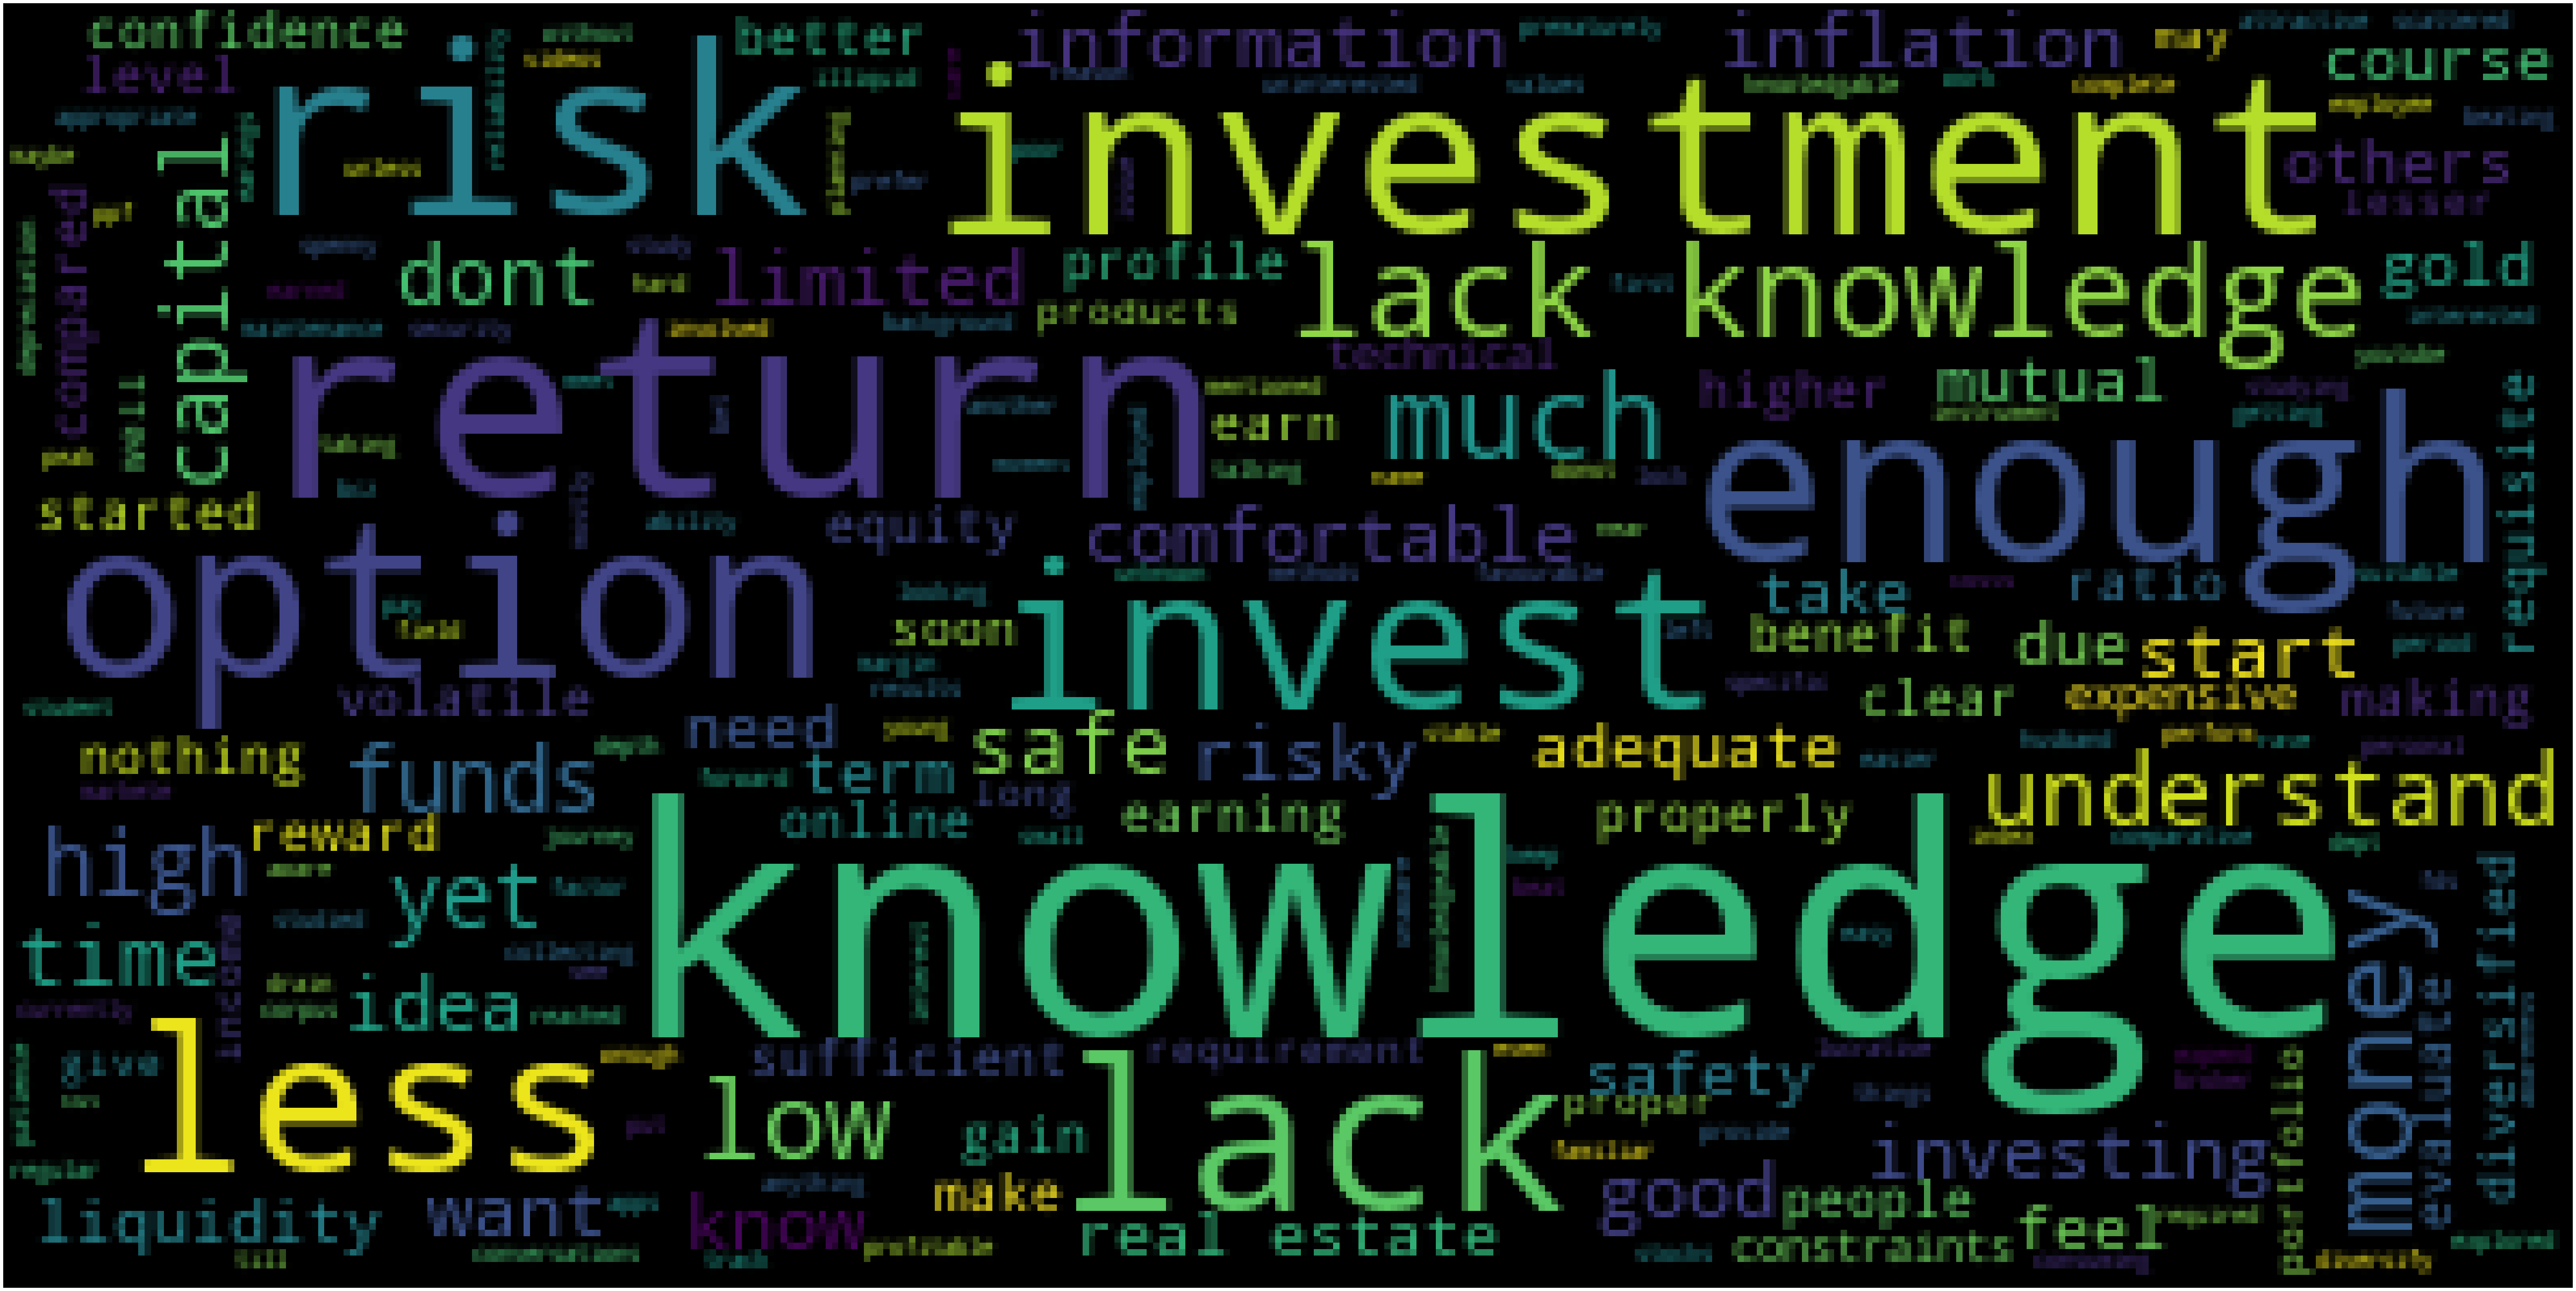

In [ ]:
wc(cleaned_data_title,'black','Common Words' )